<a href="https://colab.research.google.com/github/diana-rahma/AlgoritmadanStrukturData/blob/main/Week6_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM FILTER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Ubah ke float agar tidak overflow saat perkalian
    image = image.astype(np.float32)
    kernel = np.flipud(np.fliplr(kernel))  # Rotasi kernel 180° (konvolusi bukan korelasi)

    # Tambahkan padding di sekitar citra
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    # Ambil ukuran citra & kernel
    x_img, y_img = image_padded.shape
    x_ker, y_ker = kernel.shape

    # Hitung ukuran output
    x_out = int((x_img - x_ker) / stride) + 1
    y_out = int((y_img - y_ker) / stride) + 1

    # Siapkan array hasil konvolusi
    output = np.zeros((x_out, y_out), dtype=np.float32)

    # Lakukan konvolusi manual
    for y in range(0, y_out):
        for x in range(0, x_out):
            region = image_padded[y*stride : y*stride + x_ker, x*stride : x*stride + y_ker]
            output[y, x] = np.sum(region * kernel)

    # Normalisasi hasil agar tetap dalam rentang 0–255
    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)


In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [5]:
kernel_sharpen = np.array([[0, -1, 0],
                        [-1,  5, -1],
                        [0, -1, 0]])

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255,   0, ..., 255, 255,   0],
       [  0, 255, 179, ..., 249, 218,   0],
       ...,
       [  0, 255, 255, ..., 159, 183,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
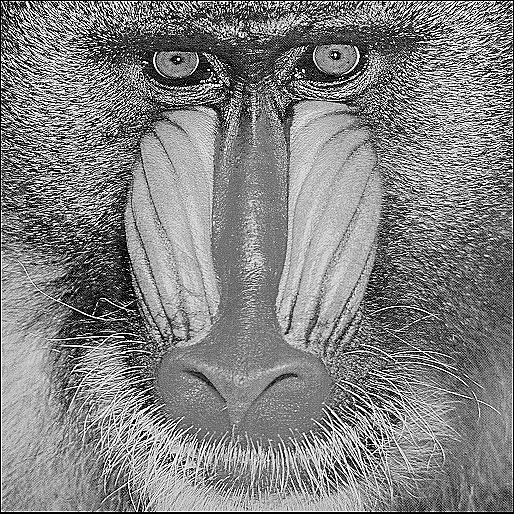

In [6]:
convolution2d(img_gray, kernel_sharpen, 1, 2)

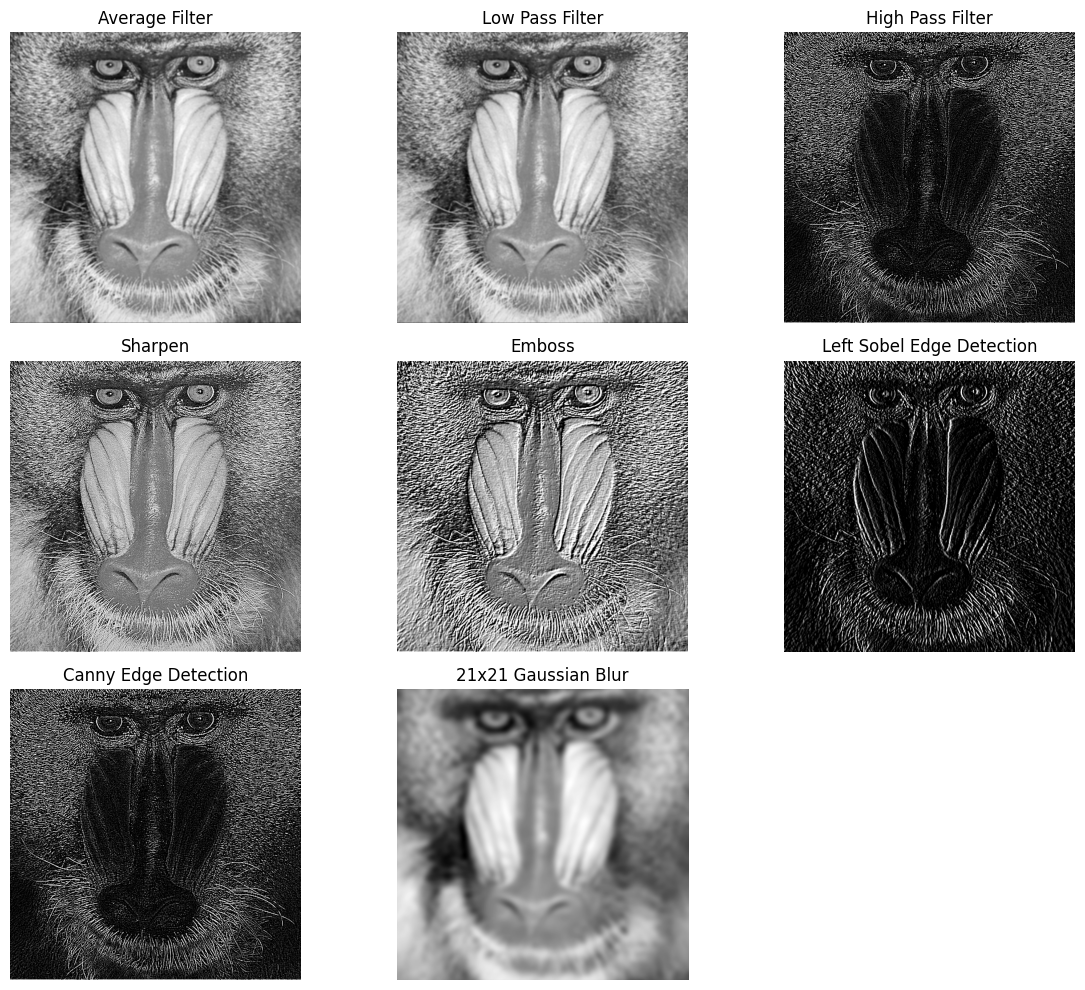

In [7]:
# D3

kernel_avg = np.ones((3,3)) / 9

# Low Pass Filter
kernel_lowpass = np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]]) / 9

# High Pass Filter
kernel_highpass = np.array([[-1,-1,-1],
                            [-1, 8,-1],
                            [-1,-1,-1]])

# Sharpen Filter
kernel_sharpen = np.array([[ 0,-1, 0],
                           [-1, 5,-1],
                           [ 0,-1, 0]])

# Emboss Filter
kernel_emboss = np.array([[-2,-1,0],
                          [-1, 1,1],
                          [ 0, 1,2]])

# Sobel Left
kernel_sobel_left = np.array([[1, 0, -1],
                              [2, 0, -2],
                              [1, 0, -1]])

# Canny Edge Detection
canny_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Gaussian Blur 21x21
kernel_size = 21
sigma = np.sqrt(kernel_size)
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel = gaussian_kernel_1d @ gaussian_kernel_1d.T


filters = {
    "Average Filter": kernel_avg,
    "Low Pass Filter": kernel_lowpass,
    "High Pass Filter": kernel_highpass,
    "Sharpen": kernel_sharpen,
    "Emboss": kernel_emboss,
    "Left Sobel Edge Detection": kernel_sobel_left,
    "Canny Edge Detection": canny_kernel,
    "21x21 Gaussian Blur": gaussian_kernel
}

plt.figure(figsize=(12, 10))
i = 1
for name, kernel in filters.items():
    result = convolution2d(img_gray, kernel)
    plt.subplot(3, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()

# FILTER LIBRARY DAN FILTER MODERN

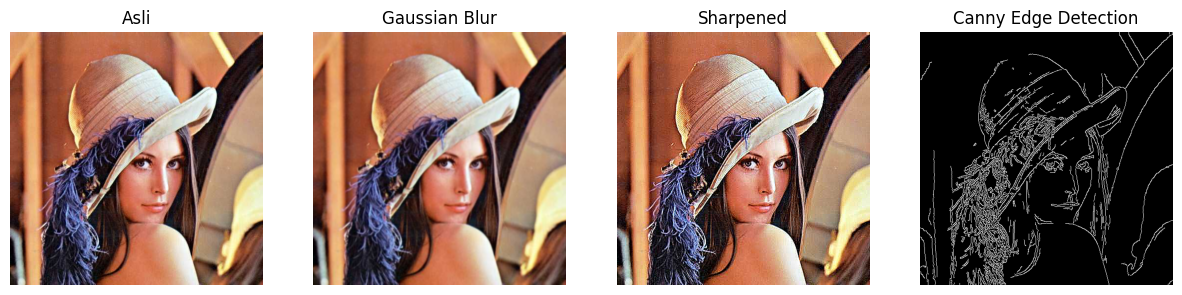

In [8]:
# Percobaan 1

# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK/lena.jpg")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img,(7,7),1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

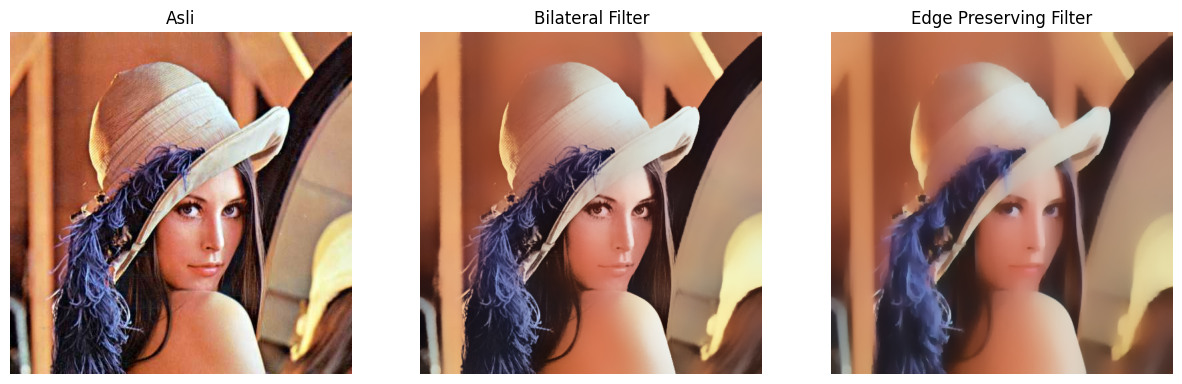

In [9]:
#percobaan 2
# filter modern dari opencv
# bilateral filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# edge preserving filter (alternatif guided filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

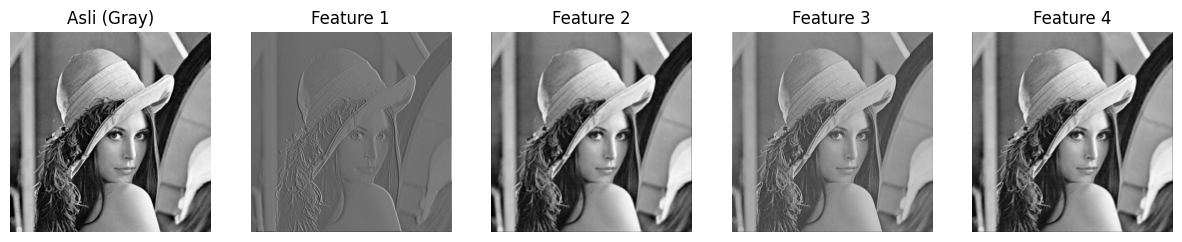

In [10]:
# percobaan 3

#Filter Feature Map yang digunakan pada CNN, Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

In [12]:
# percobaan 4

# ==================
# 1. Beauty Filter
# ==================
# Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: Brightness & contrast
alpha = 1.2  # contrast
beta = 15    # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# ==================
# 2. Old/Vintage Filter
# ==================
# Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

# Tampilkan hasil
titles = ['Asli', 'Beauty Filter', 'Old/Vintage Filter']
images = [img, beauty, old_img]

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(cv.cvtColor(images[i], cv.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()



In [13]:
# percobaan 5

# Filter Anime / Cartoon
# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral Filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

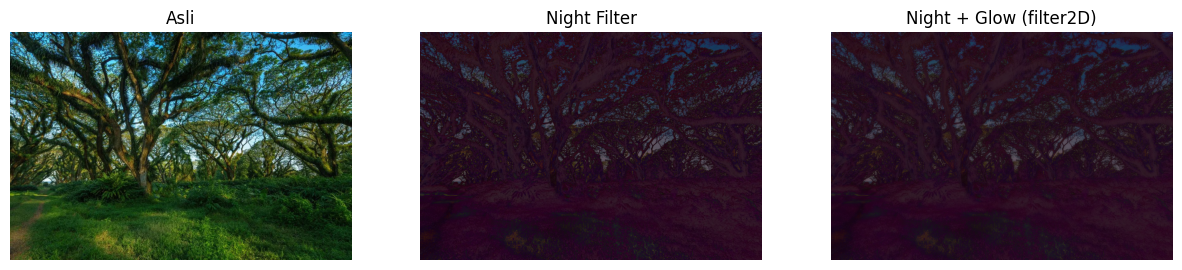

In [14]:
# Percobaan 6: Filter Malam.

#Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100)) # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15, 15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])

In [15]:
# Percobaan 7 : Filter Pagi dan Pagi ditambahkan efek kabut.

#Filter Suasana pagi dan Kabut
# ==============================
# Step 1: Kurangi kontras & cerahkan
# ==============================
alpha = 0.9 # contrast
beta = 20 # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# ==============================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# ==============================
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# ==============================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# ==============================
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah Layer putih untuk kabut Lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])
